In [5]:
import numpy as np
import sympy as sp

from IPython.display import display,HTML,Math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [233]:
class Cargasindeterminadas():
    def __init__(self):
        self.graficas = []
    
    def diseño_viga_apoyada(self,ax,longitudviga):
        """"
        Este metodo se encarga de graficar la viga apoyada en el eje x
        inicialmente la longitud de la viga será de 18 metros, este paramtro 
        se puede modificar en la funcion pasandole un valor numerico
        """
        coordenada_y = 0
        coordenada_x = 0
        vertices = [(coordenada_x,coordenada_y),longitudviga,-0.05]
        self.vC = vertices #vertices cuadrado
        ax.add_patch(
            patches.Rectangle(
            self.vC[0],
            self.vC[1],
            self.vC[2],
            fill=False,
            label='viga apoyada',
            color=("black"),
            linewidth=1.8
             ))
        return plt.plot()
    
# -/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-    
    def funciones(self,valor_final_x):
        """
        Este metodo se encarga de graficar la funcion de carga
        primero se genera una matriz de 1000 valores que tiene 
        como valor inicial 0 y valor final la varable valor_final_x
        
        return:
            retorna la grafica de la funcion de carga
        """
        
        X = np.linspace(0,valor_final_x,1000)
        Y = X**2
        return plt.plot(X,Y)
    
    def area_and_xbarra(self,longitud_viga):
        
        #variables
        x = sp.Symbol('x')
        self.funcion_carga = x**2 
        self.longitud_viga = longitud_viga
        
        display(HTML('<h2>Funciòn de carga</h2>'))
        display(Math(r"$$y=$$"+ sp.latex(self.funcion_carga)))
        
        #Area
        display(HTML('<h2>Integral de carga</h2>'))
        display(Math(r"$$Area = \int_{a}^{b}$$"+ sp.latex(self.funcion_carga )))
        area = sp.integrate(self.funcion_carga)
        
        display(HTML(f'<h4>Evaluamos en [0,{self.longitud_viga}]</h4>'))
        display(Math(f"$$Area =$$"+ sp.latex(area)))
        
        #Evaluar integral
        area = area.subs(x,self.longitud_viga)
        display(Math(f"$$Area = $$"+ sp.latex(area)))
        
        
        
        x_barra = x*(self.funcion_carga)
        x_barra = sp.integrate(x_barra)
        display(Math(r"$$\bar{x} = \int_{a}^{b}$$"+ sp.latex(x_barra)))
        
        display(HTML(f'<h4>Evaluamos en [0,{self.longitud_viga}]</h4>'))
        x_barra = x_barra.subs(x,longitud_viga) 
        display(Math(r"$$\bar{x} =$$"+ sp.latex(x_barra)))
    
        display(Math(r"$$\bar{x} = \frac{x}{Area}$$"))
        centroide_x = x_barra/area
        display(Math(r"$$\bar{x} =$$"+ sp.latex(centroide_x)))
    
        lista = [area,centroide_x]
        return lista
    
    def reaciones(self,area,centroide_x,longitud_viga):
        r3 = sp.Symbol('r3')
        
        display(HTML('<h2>Condiciones de equilibrio</h2>'))
        
        display(Math(r"$$\sum F_y=0$$"))
        display(Math(r"$$R_1 + R_2 - $$"+ sp.latex(area)+ r"$$=0$$"))
        display(HTML('<h2>---------------------------------------------</h2>'))
        display(Math(r"$$\curvearrowleft + \sum M=0$$"))
        centroide_and_area = -1*(area*centroide_x)
        reaccion_X_dista = r3*longitud_viga
        display(Math(sp.latex(centroide_and_area)+ r"$$+$$"+ sp.latex(reaccion_X_dista)+ r"$$ + M_1 = 0$$"))
        display(HTML('<h2>---------------------------------------------</h2>'))

        
    def diagrama_cortante(self):
        
        x = sp.Symbol('x')
        r1 = sp.Symbol("R_1")
        self.funcion_carga = -x**2 
        display(Math(r"$$V(x) = \int$$"+ sp.latex(self.funcion_carga)))
        self.cortante = sp.integrate(self.funcion_carga) + r1
        display(Math(r"$$V(x)=$$"+ sp.latex(self.cortante) ))
        
        display(HTML('<h2>---------------------------------------------</h2>'))

        return self.cortante
    
    def diagrama_momento(self,cortante):
        m1 = sp.Symbol('M_1')
        m1 = m1*(-1)
        x = sp.Symbol('x')
        r1 = sp.Symbol("R_1")
        
        display(HTML('<h2>Momento flector</h2>'))
        display(Math(r"$$M(x) = \int$$"+ sp.latex(cortante )))
        momento_flector = sp.integrate(cortante,x) + m1
        display(Math(r"$$M(x)=$$"+ sp.latex(momento_flector)))
        display(HTML('<h2>---------------------------------------------</h2>'))
        return momento_flector
    
    def diagrama_giro(self,momento_flector):
        m1 = sp.Symbol('M_1')
        m1 = m1*(-1)
        x = sp.Symbol('x')
        r1 = sp.Symbol("R_1")
        
        display(HTML('<h2>Giro</h2>'))
        display(Math(r"$$EI\varnothing(x) = \int$$"+ sp.latex(momento_flector )))
        giro = sp.integrate(momento_flector,x)
        display(Math(r"$$EI\varnothing(x) = $$"+ sp.latex(giro)))
        display(HTML('<h2>---------------------------------------------</h2>'))

        return giro
    
    def diagrama_deformacion(self, giro):
        
        m1 = sp.Symbol('M_1')
        m1 = m1*(-1)
        x = sp.Symbol('x')
        r1 = sp.Symbol("R_1")
        
        display(HTML('<h2>Deformacion</h2>'))
        display(Math(r"$$EIY = \int$$"+ sp.latex(giro)))
        deformacion = sp.integrate(giro,x)
        display(Math(r"$$EIY = $$"+ sp.latex(deformacion)))
        return deformacion
    
    
        
        
    def evaluacion(self,longitud_viga,cortante,momento,giro,deformacion):
        m1 = sp.Symbol('M_1')
        m1 = m1*(-1)
        x = sp.Symbol('x')
        r1 = sp.Symbol("R_1")
        display(HTML(f'<h4>Evaluamos en [{longitud_viga}] nos queda: </h4>'))
        
        cortante_evaluado = cortante.subs(x,longitud_viga) 
        display(Math(f"$$V({longitud_viga}) =$$"+ sp.latex(cortante_evaluado)))
        display(HTML('<h4>---------------------------------------------</h4>'))

        momento_evaluado = momento.subs(x,longitud_viga) 
        
        display(Math(f"$$M({longitud_viga}) =$$"+ sp.latex(momento_evaluado)))
        display(HTML('<h4>---------------------------------------------</h4>'))
        
        giro_evaluado = giro.subs(x,longitud_viga) 
        display(Math(f"$$EI({longitud_viga}) =$$"+ sp.latex(giro_evaluado)))
        display(HTML('<h4>---------------------------------------------</h4>'))
        
        deformacion_evaluado = deformacion.subs(x,longitud_viga) 
        display(Math(f"$$EIY({longitud_viga}) =$$"+ sp.latex(deformacion_evaluado)))
        
        display(HTML('<h4>----Nos queda un sistema 2x2 -----</h4>'))
        display(Math(sp.latex(momento_evaluado) + r"$$ = 0 $$"))
        display(Math(sp.latex(deformacion_evaluado) + r"$$ = 0 $$"))
        
        display(HTML('<h4>---------------------------------------------</h4>'))

        display(HTML('<h2>Resolviendo el sistema nos queda</h2>'))
        
        resultado = sp.solve([momento_evaluado,deformacion_evaluado],[m1,r1])
      
        valores = list(resultado.values())
        print(valores)
        valorm1 = valores[0]
        display(Math(r"$$M_1=$$"+ sp.latex(valorm1)))
        display(Math(r"$$R_1=$$"+ sp.latex(valores[1])))
        
        display(HTML('<h2>Reemplazamos en las ecuaciones anteriores</h2>'))
        
        valor_cortante = cortante_evaluado.subs([(m1, valorm1), (r1, valores[1])]) 
        valor_momento = momento_evaluado.subs([(m1, valorm1), (r1, valores[1])]) 
        valor_giro = giro_evaluado.subs([(m1, valorm1), (r1, valores[1])]) 
        valor_deformacion = deformacion_evaluado.subs([(m1, valorm1), (r1, valores[1])]) 
        
        display(Math(r"$$V_f=$$"+ sp.latex(valor_cortante)))
        display(Math(r"$$M_f=$$"+ sp.latex(valor_momento)))
        display(Math(r"$$EI_f=$$"+ sp.latex(valor_giro)))
        display(Math(r"$$EIY_f=$$"+ sp.latex(valor_deformacion)))
        
        display(HTML('<h2>Ecuaciones para evaluar en cualquier punto</h2>'))
        Egcortante = cortante.subs([(m1, valorm1), (r1, valores[1])])
        
        Egmomento = momento.subs([(m1, valorm1), (r1, valores[1])])
        Eggiro = giro.subs([(m1, valorm1), (r1, valores[1])])
        Egdeformacion = deformacion.subs([(m1, valorm1), (r1, valores[1])])
        
        display(Math(r"$$V(x)=$$"+ sp.latex(Egcortante)))
        display(Math(r"$$M(x)=$$"+ sp.latex(Egmomento)))
        display(Math(r"$$EI(x)=$$"+ sp.latex(Eggiro)))
        display(Math(r"$$EIY(x)=$$"+ sp.latex(Egdeformacion)))
        
        
        diagrama_cortante = sp.lambdify(x,Egcortante,np)
        X = np.linspace(0,longitud_viga,10000)
        Y = diagrama_cortante(X)
        plt.plot(X,Y)
        
        plt.show()
        
        display(HTML('<h2>Momento</h2>'))
        diagrama_moment = sp.lambdify(x,Egmomento,np)
        
        
        X = np.linspace(0,longitud_viga,10000)
        Y = diagrama_moment(X)
       
        plt.plot(X,Y)
    
        plt.show()
        display(HTML('<h2>Giro</h2>'))
        
        diagrama_giro = sp.lambdify(x,Eggiro,np)
        X = np.linspace(0,longitud_viga,10000)
        Y = diagrama_giro(X)
        plt.plot(X,Y)
        plt.show()
        display(HTML('<h2>Deformacion</h2>'))
        diagrama_deformacion= sp.lambdify(x,Egdeformacion,np)
        X = np.linspace(0,longitud_viga,10000)
        
        Y = diagrama_deformacion(X)
        
        plt.plot(X,Y)
        plt.show()
        return
        
        

    def plot(self):
 # -/-/-/-/-/-/-/-/- #Caractericticas inciales del plot -/-/-/-/-/-/-/-/-/-/-/-/-/-/-    
        longitud_viga = 1 #metros
        fig = plt.figure()
        ax = plt.subplot() 
        ax.grid(ls='--', lw=0.6)

        self.diseño_viga_apoyada(ax,longitud_viga)
        self.funciones(longitud_viga) 
        area_and_centroide = self.area_and_xbarra(longitud_viga)
        area = area_and_centroide[0]
        centroide = area_and_centroide[1]
        reaciones = self.reaciones(area,centroide,longitud_viga)
        plt.title("Cargas distribuidas en una viga")
        ax.legend()
        
        cortante = self.diagrama_cortante()
        momento_flector = self.diagrama_momento(cortante)
        giro = self.diagrama_giro(momento_flector)
        deformacion = self.diagrama_deformacion(giro)
        
        self.evaluacion(longitud_viga,cortante,momento_flector,giro,deformacion)
        
        
        
        




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[-1/30, 7/60]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

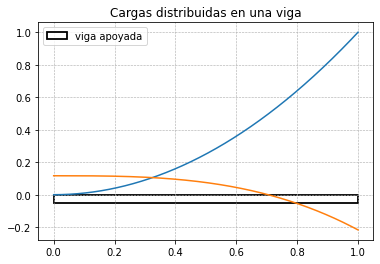

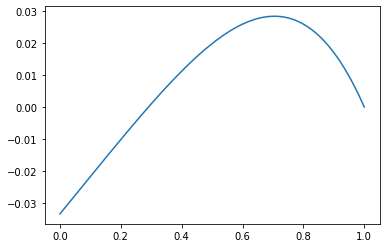

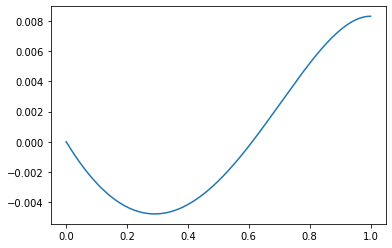

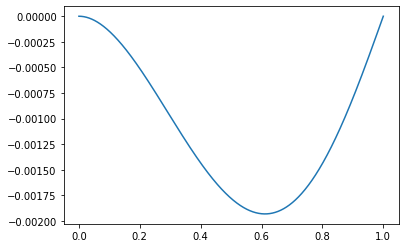

In [234]:
if __name__ == '__main__':
    cargasvigas = Cargasindeterminadas()
    cargasvigas.plot()